In [ ]:
import requests
import json
import sys
import re
import os, shutil

In [ ]:
dev = ["https://raw.githubusercontent.com/MatheusFerraroni/multiwoz-PTBR/master/data/MultiWOZ_2.2/dev/dialogues_0{}.json".format(str(i).zfill(2)) for i in range(1, 3, 1)]
test = ["https://raw.githubusercontent.com/MatheusFerraroni/multiwoz-PTBR/master/data/MultiWOZ_2.2/test/dialogues_0{}.json".format(str(i).zfill(2)) for i in range(1, 3, 1)]
train = ["https://raw.githubusercontent.com/MatheusFerraroni/multiwoz-PTBR/master/data/MultiWOZ_2.2/train/dialogues_0{}.json".format(str(i).zfill(2)) for i in range(1, 18, 1)]

In [ ]:
def get_dados(urls):
    base_header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
    }
    req = None

    rets = []
    for d in urls:
        req = requests.get(d, headers=base_header).text
        dst = "".join(d.split("/")[-2:])

        with open(dst, "w") as f:
            f.write(req)
        
        rets.append(dst)

    return rets

files_to_translate = []
files_to_translate += get_dados(dev)
files_to_translate += get_dados(test)
files_to_translate += get_dados(train)
print(files_to_translate)

['devdialogues_001.json', 'devdialogues_002.json', 'testdialogues_001.json', 'testdialogues_002.json', 'traindialogues_001.json', 'traindialogues_002.json', 'traindialogues_003.json', 'traindialogues_004.json', 'traindialogues_005.json', 'traindialogues_006.json', 'traindialogues_007.json', 'traindialogues_008.json', 'traindialogues_009.json', 'traindialogues_010.json', 'traindialogues_011.json', 'traindialogues_012.json', 'traindialogues_013.json', 'traindialogues_014.json', 'traindialogues_015.json', 'traindialogues_016.json', 'traindialogues_017.json']


In [ ]:
""" Rotina que retorna posicao inicial e final de uma substring dentro de uma string

Parâmetros: s - string maior
            char - substring
Saída: (posicao_inicial, posicao_final)

"""

pattern_hora_dd_dd = re.compile("(\d\d:\d\d)")
pattern_hora_d_dd = re.compile("(\d:\d\d)")
def find_str(utterance, piece):


    if type(piece)!=str:
        return None, None

        
    utt = utterance.lower()
    pieces = [str(piece).lower()]

    for piece in pieces:
        found_hour = pattern_hora_dd_dd.search(str(piece)) # adjust for hour
        if found_hour:
            hour_string = found_hour.group()

            hora = int(hour_string[0:2])
            format_1 = "{}h{}".format(hora, hour_string[3:5])
            format_1 = piece.replace(hour_string, format_1)
            pieces.append(format_1)

            if hora<12:
                hora += 12
                format_1 = "{}h{}".format(hora, hour_string[3:5])
                format_1 = piece.replace(hour_string, format_1)
                pieces.append(format_1)

            if hour_string[3:5]=="00":
                hora = int(hour_string[0:2])
                format_2 = "{}h".format(hora)
                format_2 = piece.replace(hour_string, format_2)
                pieces.append(format_2)

                    
                if hora<12:
                    hora += 12
                    format_2 = "{}h".format(hora)
                    format_2 = piece.replace(hour_string, format_2)
                    pieces.append(format_2)
        else:
            found_hour = pattern_hora_d_dd.search(str(piece)) # adjust for hour
            if found_hour:
                hour_string = found_hour.group()

                hora = int(hour_string[0:1])
                format_1 = "{}h{}".format(hora, hour_string[2:4])
                format_1 = piece.replace(hour_string, format_1)
                pieces.append(format_1)
                if hora<12:
                    hora += 12
                    format_1 = "{}h{}".format(hora, hour_string[2:4])
                    format_1 = piece.replace(hour_string, format_1)
                    pieces.append(format_1)

                if hour_string[3:5]=="00":
                    hora = int(hour_string[0:1])
                    format_2 = "{}h".format(hora)
                    format_2 = piece.replace(hour_string, format_2)
                    pieces.append(format_2)

                    if hora<12:
                        hora += 12
                        format_2 = "{}h".format(hora)
                        format_2 = piece.replace(hour_string, format_2)
                        pieces.append(format_2)


    for piece in pieces.copy():
        piece = str(piece)
        if piece=="chinês":
            pieces.append("chinesa")
            pieces.append("chineses")
            pieces.append("chinese")
        elif piece=='europeu':
            pieces.append('europeia')
        elif piece=='indiano':
            pieces.append('indiana')
            pieces.append('índio')
        elif piece=='italiano':
            pieces.append('italiana')
        elif piece=='português':
            pieces.append('portuguesa')
        elif piece=='tailandês':
            pieces.append('tailandêsa')
            pieces.append('tailandesa')
        elif piece=='britânico':
            pieces.append('britânica')
        elif piece=='mediterrâneo':
            pieces.append('mediterrânea')
        elif piece=='turco':
            pieces.append('turca')
        elif piece=='africano':
            pieces.append('africana')
        elif piece=='alibaba':
            pieces.append('ali baba')
        elif piece=='francês':
            pieces.append('frances')
        elif piece=='norte-americano':
            pieces.append('norte-americana')
        elif piece=='libanês':
            pieces.append('libanesa')
        elif piece=='coreano':
            pieces.append('coreana')
        elif piece=='mexicano':
            pieces.append('mexicana')
        elif piece=='indiano':
            pieces.append('indiana')




           #hardcode para resolver problemas mais recorrentes no dicionario de erro
        elif piece == 'cambridge museum of technology':
            pieces.append('museu de tecnologia de cambridge')
        elif piece == 'alexander cama e café da manhã':
            pieces.append('alexander bed and breakfast')
            pieces.append('pousada Alexander')
            pieces.append("pequeno-almoço alexander")
        elif piece == 'europeu moderno':
            pieces.append('comida europeia moderna')
        elif piece == 'casa de hóspedes bolota':
            pieces.append('acorn guest house')
            pieces.append('casa de hóspedes acorn')
            pieces.append('pousada acorn')
        elif piece == 'colégio de cristo':
            pieces.append('christ&#39;s college')
        elif piece == 'casa de outono':
            pieces.append('autumn house')
            pieces.append('hotel de outono')
            pieces.append('casa do outono')
            pieces.append('casa outono')
        elif piece == 'casa de hóspedes a e b':
            pieces.append('casa de hóspedes aeb')
            pieces.append('aeb guest house')
        elif piece == 'expresso por holiday inn cambridge':
            pieces.append('expresso da holiday inn cambridge')
            pieces.append('expresso do holiday inn cambridge')
            pieces.append('expresso pelo holiday inn cambridge')
            pieces.append('expresso pela holiday inn cambridge')
            pieces.append('express by holiday inn cambridge')
        elif piece == 'oriental asiático':
            pieces.append('asiático oriental')
            pieces.append('comida oriental oriental')
            pieces.append('comida oriental asiática')
            pieces.append('cozinha oriental asiática')
        elif piece == 'todos os santos igreja':
            pieces.append('igreja de todos os santos')
            pieces.append('igreja dos santos')
            pieces.append('todos os santos da igreja')
            pieces.append('igreja de santos')
            pieces.append('igrejas dos santos')
        elif piece == 'hotel de armas universitário' :
            pieces.append('hotel de armas universitárias')
            pieces.append('hotel de armas da universidade')
            pieces.append('hotel universitário de armas')
        elif piece == 'velhas escolas' :
            pieces.append('escolas antigas')
        elif piece == 'casa de casa' :
            pieces.append('casa longe de casa')
        elif piece == 'cama e pequeno almoço carolina' :
            pieces.append('cama e pequeno-almoço carolina')
            pieces.append('pousada carolina')
            pieces.append('bed and breakfast carolina')
            pieces.append('cama e café da manhã carolina')
            pieces.append('carolina bed and breakfast')
            pieces.append('carolina cama e café da manhã')
            pieces.append('cama e café carolina')
        elif piece == 'tentilhões cama e café da manhã' :
            pieces.append('bed and breakfast tentilhões')
            pieces.append('pousada dos tentilhões')
            pieces.append('finches bed and breakfast')
            pieces.append('pousada finches')
            pieces.append('cama e pequeno-almoço de tentilhões')
            pieces.append('pousada tentilhões')
            pieces.append('Cama e Café finches')
            pieces.append('passarinhos cama e café da manhã')
            pieces.append('pousada de tentilhões')
            pieces.append('cama e café da manhã dos tentilhões')
            pieces.append('cama e pequeno-almoço dos tentilhões')
            pieces.append('bed and breakfast finches')
            pieces.append('cama e o pequeno almoço dos finches')
            pieces.append('pousada cama e café dos tentilhões')
        elif piece == 'acorn guest house' :
            pieces.append('pousada Acorn')
            pieces.append('casa de hóspedes Acorn')
            pieces.append('hospedaria Acorn')
        elif piece == 'rosa&#39;s' :
            pieces.append('bed and breakfast da rosa')
            pieces.append('bed and breakfast do rosa')
            pieces.append('cama e café da manhã de rosa')
            pieces.append('cama e café da manhã da rosa')
            pieces.append('pousada de rosa')
            pieces.append('bed and breakfast de rosa')
            pieces.append('cama e café da rosa')
            pieces.append('pousada da rosa')
            pieces.append('casa de rosa')
            pieces.append('o rosa')     
        elif piece == 'a junção' :
            pieces.append('cruzamento')
            pieces.append('entroncamento')
            pieces.append('junction')
            pieces.append('junção')
        elif piece == 'pousada aylesbray lodge' :
            pieces.append('aylesbray lodge guest house')
            pieces.append('casa de hóspedes do aylesbray lodge')
            pieces.append('casa de hóspedes aylesbray lodge')
            pieces.append('aylesbray lodge')
        elif piece == 'a estrela da sorte' :
            pieces.append('the lucky star')
            pieces.append('lucky star')
            pieces.append('estrela da sorte')
        elif piece == 'faculdade de cristo' :
            pieces.append('colégio de cristo')
            pieces.append('escola de cristo')
        elif piece == 'pousada arbury lodge' :
            pieces.append('arbury lodge guesthouse')
            pieces.append('pousada do arbury lodge')
            pieces.append('hospedaria arbury lodge')
            pieces.append('casa de hóspedes do arbury lodge')
        elif piece == 'teatro adc' :
            pieces.append('adc theatre')
            pieces.append('adc theater')
        elif piece == 'centro da cidade ao norte b e b' :
            pieces.append('centro da cidade ao norte be b')
            pieces.append('city centre norte b e b')
            pieces.append('city center north b and b')
            pieces.append('city center north be b')
            pieces.append('centro norte b e b')
            pieces.append('centro de cidade ao norte be b')
            pieces.append('city centre north be b')
            pieces.append('centro da cidade norte b e b')
            pieces.append('hotel b e b no centro da cidade')
            pieces.append('centro da cidade, norte b e b')
            pieces.append('centro norte be b')
            pieces.append('centro da cidade, ao norte be b')
            pieces.append('centro da cidade, hotel b e b')
        elif piece == 'galeria broughton house' :
            pieces.append('broughton house gallery')
            pieces.append('galeria da broughton house')
        elif piece == 'restaurante de parada na cidade' :
            pieces.append('city stop restaurant')
            pieces.append('city stop')
            pieces.append('restaurante de parada da cidade')
            pieces.append('restaurante da cidade')
            pieces.append('restaurante da parada da cidade ')
        elif piece == 'piscinas ao lado do parque' :
            pieces.append('piscinas de parkside')
            pieces.append('poolside park')
            pieces.append('piscinas do parque')
            pieces.append('parkside pools')
            pieces.append('piscinas à beira do parque')
            pieces.append('piscinas centrais do parque')
            pieces.append('piscinas parkside')
            pieces.append('piscinas do parkside')
        elif piece == 'frankie e bennys' :
            pieces.append('frankie and bennys')
        elif piece == 'restaurante peking' :
            pieces.append('restaurante pequim')
            pieces.append('peking restaurant')
            pieces.append('pequim')
            pieces.append('restaurante laqueado')
        elif piece == 'casa de hobsons' :
            pieces.append('casa dos hobsons')
            pieces.append('hobsons house')
            pieces.append('casa hobsons')
        elif piece == 'ashley hotel' :
            pieces.append('hotel ashley')
            pieces.append('bood ashley')
        elif piece == 'palácio tandoori' :
            pieces.append('tandoori palace')
        elif piece == 'cozinha gourmet de hambúrguer' :
            pieces.append('gourmet burger kitchen')
            pieces.append('cozinha gourmet burger')
        elif piece == 'perguntar' :
            pieces.append('ask')
            pieces.append('que pergunte')
            pieces.append('a pergunta')
        elif piece == 'vale a pena casa' :
            pieces.append('worth house')
            pieces.append('casa de valor')
            pieces.append('casa que vale a pena')
            pieces.append('casa worth')
            pieces.append('pena casa')
            pieces.append('casa no valor')
            pieces.append('casa do worth')
        elif piece == 'descanso para viajantes' :
            pieces.append('travellers rest')
            pieces.append('travelers rest')
        elif piece == 'príncipe curry' :
            pieces.append('príncipe do curry')
            pieces.append('curry prince')
            pieces.append('curry príncipe')
            pieces.append('príncipe de curry')
        elif piece == 'o homem na lua' :
            pieces.append('o homem da lua')
            pieces.append('the man on the moon')
            pieces.append('homem na lua')
            pieces.append('man on the moon')
            pieces.append('o homem na sala de concertos da lua')
        elif piece == 'escolas antigas' :
            pieces.append('old schools')
        elif piece == 'quintal da chaleira' :
            pieces.append('kettle&#39;s yard')
            pieces.append('quintal de kettle')
            pieces.append('pátio da chaleira')
        elif piece == 'restaurante bar chiquito' :
            pieces.append('chiquito restaurant bar')
            pieces.append('bar do restaurante chiquito')
            pieces.append('chiquito restaurante bar')
            pieces.append('bar restaurante chiquito')            
        elif piece == 'j restaurante' :            
            pieces.append('restaurante j')
            pieces.append('j restaurant')
            pieces.append('um restaurante')
        elif piece == 'casa warkworth' :
            pieces.append('warkworth house')
        elif piece == 'especiaria real' :
            pieces.append('tempero real')
            pieces.append('especiarias reais')
            pieces.append('royal spice')
        elif piece == 'a gardênia' :
            pieces.append('the gardenia')
            pieces.append('o gardenia')
            pieces.append('restaurante de gardênia')
            pieces.append('restaurante gardenia')
            pieces.append('gardenia')
        elif piece == 'jardim yu' :
            pieces.append('yu garden')
        elif piece == 'jardim de curry' :
            pieces.append('curry garden')
        elif piece == 'galerias do castelo' :
            pieces.append('castle galleries museum')
            pieces.append('castle galleries')
        elif piece == 'o lugar' :
            pieces.append('the place')
            pieces.append('lugar')
            pieces.append('local')
        elif piece == 'beduíno' :
            pieces.append('bedouin')
        elif piece =='a e b guest house':
            pieces.append('guest house a e b')
            pieces.append('a and b Guest house')
            pieces.append('guest House a and b')
            pieces.append('casa de h\u00f3spedes a e b')
            pieces.append('casa de h\u00f3spedes a and b')
        elif piece =='tang chinês':
            pieces.append('tang chinese')
            pieces.append('chin\u00eas tang')
            pieces.append('chineses tang')
        elif piece =='casa de hóspedes alfa-milton':
            pieces.append('alpha-milton guest house')
            pieces.append('alfa-milton guest house')
            pieces.append('pousada alfa-milton')
            pieces.append('pousada alpha-milton')
            pieces.append('casa de h\u00f3spedes alpha-milton')
        elif piece =='grafite':
            pieces.append('graffiti')
        elif piece =='casa de hóspedes da ponte':
            pieces.append('casa de h\u00f3spedes de bridge')
            pieces.append('casa de h\u00f3spedes ponte')
            pieces.append('pens\u00e3o ponte')
            pieces.append('pousada da ponte')
            pieces.append('pousada bridge')
            pieces.append('h\u00f3spedes de bridge')
            pieces.append('bridge guest house')
            pieces.append('casa de h\u00f3spedes bridge')
            pieces.append('casa de h\u00f3spedes do bridge')
            pieces.append('casa de h\u00f3spedes na ponte')
        elif piece =='saigon city':
            pieces.append('cidade de saigon')
        elif piece =='brasserie ribeirinha':
            pieces.append('brasserie \u00e0 beira-rio')
            pieces.append('brasserie \u00e0 beira do rio')
            pieces.append('brasserie \u00e0s margens do rio')
            pieces.append('riverside brasserie')
            pieces.append('cervejaria \u00e0 beira-rio')
        elif piece =='restaurante stazione e café':
            pieces.append('restaurante e caf\u00e9 stazione')
            pieces.append('restaurante stazione e o caf\u00e9')
            pieces.append('stazione restaurant and coffee bar')
        elif piece =='asiáticos':
            pieces.append('asi\u00e1tico')
            pieces.append('asi\u00e1tica')
        elif piece =='japonês':
            pieces.append('japonesa')
            pieces.append('japoneses')
        elif piece =='galeria cafe jello':
            pieces.append('cafe jello gallery')
            pieces.append('caf\u00e9 jello gallery')
        elif piece =='casa de arroz':
            pieces.append('casa do arroz')
            pieces.append('rice house')
        elif piece =='broughton house gallery':
            pieces.append('galeria broughton house')
            pieces.append('galeria da casa broughton')
            pieces.append('galeria da broughton house')
        elif piece =='alexandre':
            pieces.append('alexander')













    for piece in pieces:
        index = 0
        piece=piece.lower()
        len_piece = len(piece)
        while(index!=len(utt)):
            if utt[index:index+len_piece]==piece: # comparacao por slicing
                return (index, index+len_piece)
            index+=1

    return None, None




# print(find_str("Eu recomendo Broughton House Gallery. É o único museu do Centro e a entrada é gratuita. isso parece bom para você?", "Broughton House Gallery"))

# sys.exit()

contador_acerto = 0
contador_erro = 0


if os.path.isdir("./new/"):
    shutil.rmtree("./new/")
os.mkdir("./new/")
os.mkdir("./new/dev")
os.mkdir("./new/train")
os.mkdir("./new/test")


palavras_erro = {}
for arquivo in files_to_translate:
    # print(arquivo)
    with open(arquivo, 'r') as fp:
        dat = json.loads(fp.read())


    for i in range(len(dat)):
        for i_turns in range(len(dat[i]['turns'])):
            piece = dat[i]['turns'][i_turns]
            utterance = piece['utterance']

            # print(utterance)

            for i_frames in range(len(piece['frames'])):
                frame = piece['frames'][i_frames]

                for i_slots in range(len(frame['slots'])):
                    slot = frame['slots'][i_slots]

                    if 'start' in slot:

                        start, end = find_str(utterance, slot['value'])

                        if start!=None and end!=None:
                            contador_acerto += 1

                            # update start, end
                            dat[i]['turns'][i_turns]['frames'][i_frames]['slots'][i_slots]['start'] = start
                            dat[i]['turns'][i_turns]['frames'][i_frames]['slots'][i_slots]['exclusive_end'] = end

                            # update value
                            dat[i]['turns'][i_turns]['frames'][i_frames]['slots'][i_slots]['value'] = dat[i]['turns'][i_turns]['utterance'][start:end]
                            dat[i]['turns'][i_turns]['frames'][i_frames]['slots'][i_slots]['translated'] = True

                        else:
                            dat[i]['turns'][i_turns]['frames'][i_frames]['slots'][i_slots]['translated'] = False

                            if slot['value']=='Alexandre':
                                print(slot['value'], "#", json.dumps(utterance))
                            try:
                                palavras_erro[str(slot['value'])] += 1
                            except:
                                palavras_erro[str(slot['value'])] = 1
                            contador_erro += 1

    arquivo = arquivo.replace("devd", 'dev/d').replace("testd", 'test/d').replace("traind", 'train/d')
    with open("./new/{}".format(arquivo), 'w') as fp:
        fp.write(json.dumps(dat, indent=2))

    # print("Acertos:", contador_acerto, "Erros:", contador_erro)


print(contador_erro)
# count most significant errors
erros = []
for er in palavras_erro:
    erros.append({'text': er, 'total': palavras_erro[er]})
erros.sort(key=lambda x: x['total'], reverse=True)

# show top 20 errors
erros[0:20]

2767


[{'text': 'galerias de castelo', 'total': 16},
 {'text': 'Restaurante de casa de verão', 'total': 16},
 {'text': 'casa de cozinha e loja de vinhos darrys', 'total': 16},
 {'text': 'a meia faltando', 'total': 16},
 {'text': 'Centro da cidade Norte B e B', 'total': 16},
 {'text': '9:00', 'total': 16},
 {'text': 'Kimmoy', 'total': 16},
 {'text': 'Kirkwood House', 'total': 16},
 {'text': 'hotel Huntingdon Marriott', 'total': 16},
 {'text': 'Costeleta de São João', 'total': 16},
 {'text': 'Pizza Hut centro da cidade', 'total': 16},
 {'text': 'irlandês', 'total': 16},
 {'text': 'austríaco', 'total': 16},
 {'text': 'barra de macarrão yippee', 'total': 15},
 {'text': 'barra de macarrão dojo', 'total': 15},
 {'text': 'piscina exterior verde jesus', 'total': 15},
 {'text': 'derrubando faculdade', 'total': 15},
 {'text': 'Casa dourada', 'total': 15},
 {'text': 'Cherry Hinton Village Center', 'total': 15},
 {'text': 'suíço', 'total': 15}]

313


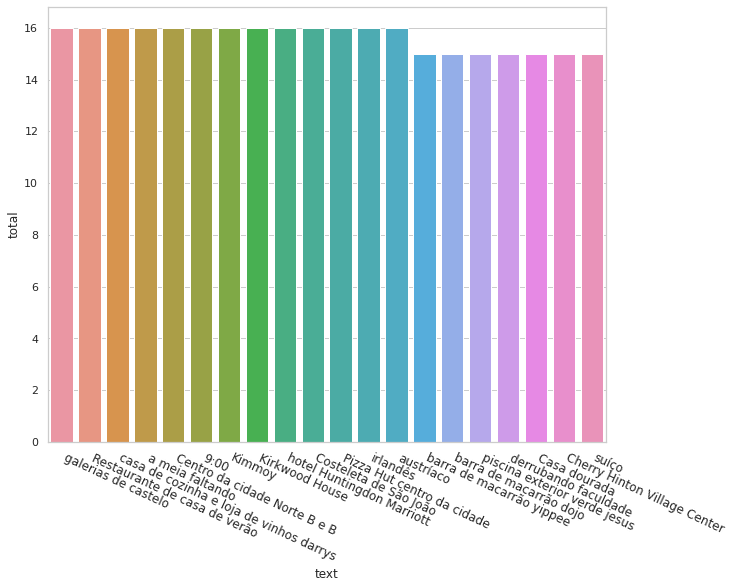

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(10,8))

df = pd.DataFrame(erros)
df = df[df.total>=15]

print(df.total.sum())

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="text", y="total", data=df)


_ = plt.xticks(rotation=-25, ha="left", fontsize=12)

In [ ]:
! zip -r out.zip ./new/

  adding: new/ (stored 0%)
  adding: new/train/ (stored 0%)
  adding: new/train/dialogues_014.json (deflated 96%)
  adding: new/train/dialogues_017.json (deflated 96%)
  adding: new/train/dialogues_006.json (deflated 96%)
  adding: new/train/dialogues_005.json (deflated 96%)
  adding: new/train/dialogues_009.json (deflated 96%)
  adding: new/train/dialogues_004.json (deflated 95%)
  adding: new/train/dialogues_016.json (deflated 96%)
  adding: new/train/dialogues_010.json (deflated 96%)
  adding: new/train/dialogues_001.json (deflated 96%)
  adding: new/train/dialogues_011.json (deflated 96%)
  adding: new/train/dialogues_003.json (deflated 95%)
  adding: new/train/dialogues_007.json (deflated 95%)
  adding: new/train/dialogues_002.json (deflated 96%)
  adding: new/train/dialogues_008.json (deflated 96%)
  adding: new/train/dialogues_012.json (deflated 96%)
  adding: new/train/dialogues_013.json (deflated 96%)
  adding: new/train/dialogues_015.json (deflated 96%)
  adding: new/dev/ (st